In [76]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
import sklearn
#...
# YOUR CODE HERE

/Applications/anaconda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Applications/anaconda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Applications/anaconda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


(4363, 11)

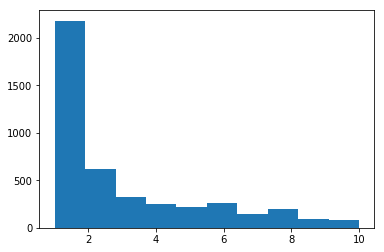

In [77]:
# Load the data and cleanup
x_test_df = pd.read_csv('test_data.csv', header = None)
y_test_df = pd.read_csv('dummy_solution_accuracy.csv')
x_train_df = pd.read_csv('train_data.csv', header = None)
y_train_df = pd.read_csv('train_labels.csv', header = None)

#Convert the dataframe to numpy matrix
x_test = x_test_df.as_matrix()
y_test = y_test_df.as_matrix()
x_train = x_train_df.as_matrix()
y_train = y_train_df.as_matrix()


y_train_dummy =  keras.utils.to_categorical(y_train)
#test_label_dummy = keras.utils.to_categorical(test_label)
np.unique(y_train)
plt.hist(y_train, bins = 10)
y_train_dummy.shape



In [6]:
#Analysis of the input data
# ...
#model = Sequential()
#model.add(Dense(300, activation='relu', input_dim=264))
#model.add(Dense(30, activation = 'relu'))
#model.add(Dense(11, activation='softmax'))
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
#model.fit(x_train, y_train_dummy, batch_size=60, epochs=10)
from keras.applications import VGG16, VGG19



553467904/553467096 [==============================] - 78s 0us/step


In [8]:
vgg16_model = keras.applications.vgg16.VGG16()

In [9]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [72]:
model = Sequential()
model.add(Dense(300, activation='relu', input_dim=264))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(11, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train_dummy, batch_size=60, epochs=10)

Epoch 1/10
4363/4363 [==============================] - 3s 683us/step - loss: 15.3571 - acc: 0.0472
Epoch 2/10
4363/4363 [==============================] - 1s 222us/step - loss: 15.3571 - acc: 0.0472
Epoch 3/10
4363/4363 [==============================] - 1s 231us/step - loss: 15.3571 - acc: 0.0472
Epoch 4/10
4363/4363 [==============================] - 1s 223us/step - loss: 15.3571 - acc: 0.0472
Epoch 5/10
4363/4363 [==============================] - 1s 205us/step - loss: 15.3571 - acc: 0.0472
Epoch 6/10
4363/4363 [==============================] - 1s 171us/step - loss: 15.3571 - acc: 0.0472
Epoch 7/10
4363/4363 [==============================] - 1s 185us/step - loss: 15.3571 - acc: 0.0472
Epoch 8/10
4363/4363 [==============================] - 1s 195us/step - loss: 15.3571 - acc: 0.0472
Epoch 9/10
4363/4363 [==============================] - 1s 183us/step - loss: 15.3571 - acc: 0.0472
Epoch 10/10
4363/4363 [==============================] - 1s 175us/step - loss: 15.3571 - acc: 0.0472

[[1.0407e+03 2.3156e+03 2.8391e+03 ... 7.4371e-02 7.3162e-02 5.9463e-02]
 [2.3094e+03 4.7804e+03 4.0557e+03 ... 5.2523e-02 5.2357e-02 5.5297e-02]
 [2.3319e+03 4.6070e+03 4.7323e+03 ... 6.1138e-02 8.5509e-02 4.9422e-02]
 ...
 [2.6242e+03 3.6887e+03 2.1284e+03 ... 6.5561e-02 5.2131e-02 8.0473e-02]
 [2.7510e+03 3.7674e+03 3.8587e+03 ... 5.6053e-02 4.2466e-02 5.7299e-02]
 [4.6222e+03 4.4102e+03 2.1174e+03 ... 1.1781e-01 9.8176e-02 3.2360e-02]]


In [78]:
#Logistic regression
from sklearn.linear_model import LogisticRegression # import logistic package
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import metrics

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)

confusion_matrix = metrics.confusion_matrix(y_test[:,1], predictions)
report_classification = metrics.classification_report(y_test[:,1], predictions)
score = logreg.score(x_test,y_test[:,1])
accuracy = accuracy_score(y_test[:,1],predictions)
print('Accuracy: '  + str(accuracy))

/Applications/anaconda/envs/myenv/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7739914425427873


/Applications/anaconda/envs/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [79]:
print(confusion_matrix)
print(report_classification)

[[5065  962  450   34   27    3    3]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           1       1.00      0.77      0.87      6544
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

   micro avg       0.77      0.77      0.77      6544
   macro avg       0.14      0.11      0.12      6544
weighted avg       1.00      0.77      0.87      6544



In [81]:
#from sklearn.model_selection import cross_val_score
#cross_val = cross_val_score(LogisticRegression(), x_test, y_test[:,1], scoring='accuracy', cv=10)


In [82]:
#https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [94]:
#Testing with Random Forest

from sklearn.ensemble import RandomForestRegressor


RandomForest_model = RandomForestRegressor(n_estimators=20, random_state=0)  
RandomForest_model.fit(x_train, y_train)  
RF_predictions = RandomForest_model.predict(x_test)  

y_train.dtypes


/Applications/anaconda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [105]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(y_test[:,1],RF_predictions))  
#print(classification_report(y_test[:,1],RF_predictions))  
#print(accuracy_score(y_test[:,1],RF_predictions)) 

y_train.dtype

dtype('int64')